In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
pip install --upgrade tensorflow-estimator==2.3.0

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Hybrid2.csv')

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Hybrid2-test.csv')

In [ ]:
df

,Material,Current,T-ON,T -OFF,N,V,GN,Average MRR (g/min),Average Ra (mm)
0,1,4.00,53.00,0.00,1000.00,4.15,320.00,0.0227,4.24
1,1,4.00,53.00,0.00,1000.00,4.15,320.00,0.0215,4.11
2,1,3.00,35.00,-1.00,750.00,2.25,180.00,0.0151,3.06
3,1,5.00,71.00,-1.00,750.00,2.25,180.00,0.0417,5.82
4,1,5.00,35.00,1.00,750.00,2.25,180.00,0.0281,4.74
...,...,...,...,...,...,...,...,...,...
115,0,4.62,21.52,19.10,527.45,4.37,127.06,0.0404,4.52
116,0,4.75,57.94,12.20,1378.43,7.47,293.65,0.0416,4.54
117,0,5.42,33.94,20.67,629.41,1.18,215.53,0.0417,4.54
118,0,4.60,41.00,14.24,594.12,1.87,112.00,0.0442,4.63


In [ ]:
X_train = df.iloc[:,:7]
X_test = df1.iloc[:,:7]

In [ ]:
X_test.shape

(14, 7)

In [ ]:
Y_train

,Average MRR (g/min),Average Ra (mm)
0,0.0227,4.24
1,0.0215,4.11
2,0.0151,3.06
3,0.0417,5.82
4,0.0281,4.74
...,...,...
115,0.0404,4.52
116,0.0416,4.54
117,0.0417,4.54
118,0.0442,4.63


In [ ]:
Y_train = df.iloc[:,7:]
Y_test = df1.iloc[:,7:]

In [ ]:
Y_test = Y_test.iloc[:,:2]

In [ ]:
Y_train1 = Y_train.iloc[:,1:]
Y_test1 = Y_test.iloc[:,1:]

In [ ]:
Y_train2 = Y_train.iloc[:,:1]
Y_test2 = Y_test.iloc[:,:1]

In [ ]:
Y_train2.shape

(120, 1)

In [ ]:
X_train1 = X_train
X_test1 = X_test
X_train1['Average Ra (mm)'] = Y_train1
X_test1['Average Ra (mm)'] = Y_test1

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=5
)  # It tries 3 different models.
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    X_train_norm,
    # The name of the label column.
    Y_train2,
    epochs=500,
)
# Predict with the best model.


Trial 2 Complete [00h 00m 08s]
val_loss: 0.357074111700058

Best val_loss So Far: 0.061971019953489304
Total elapsed time: 00h 01m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/500
4/4 [==============================] - 1s 6ms/step - loss: 19.4875 - mean_squared_error: 19.4875
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 18.7138 - mean_squared_error: 18.7138
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 18.0011 - mean_squared_error: 18.0011
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 17.3234 - mean_squared_error: 17.3234
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 16.6665 - mean_squared_error: 16.6665
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 16.0142 - mean_squared_error: 16.0142
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 15.3654 - mean_squared_error: 15.3654
Epoch 8/500
4/4 [==============================] - 0s 6ms/step -

In [ ]:
 y_pred = reg.predict(X_test)

1/1 [==============================] - 0s 12ms/step


In [ ]:
y_pred

array([[ 9.296525 ],
       [ 7.942764 ],
       [11.319705 ],
       [ 5.6429706],
       [35.993702 ],
       [16.508366 ],
       [14.487756 ],
       [ 9.296525 ],
       [11.319705 ],
       [ 5.6429706],
       [35.993702 ],
       [13.849315 ],
       [16.508366 ],
       [14.487756 ]], dtype=float32)

In [ ]:
Y_test2

,Average MRR (g/min)
0,7.0
1,7.4
2,12.2
3,8.9
4,9.8
5,14.5
6,10.3
7,9.7
8,12.8
9,9.8


In [ ]:
import sklearn
from sklearn import metrics,

In [ ]:
sklearn.metrics.r2_score(Y_test2, y_pred )

-7.163560598139284

In [ ]:
 sklearn.metrics.mean_squared_error(Y_test2, y_pred)

103.3927445000154

In [ ]:
df.nunique()

Material                 2
Current                 40
T-ON                    45
T -OFF                  45
N                       44
V                       49
GN                      41
Average MRR (g/min)    103
Average Ra (mm)        101
dtype: int64

In [ ]:
##Relationship Analysis

In [ ]:
corelation = df.corr()

In [ ]:
import seaborn as sns

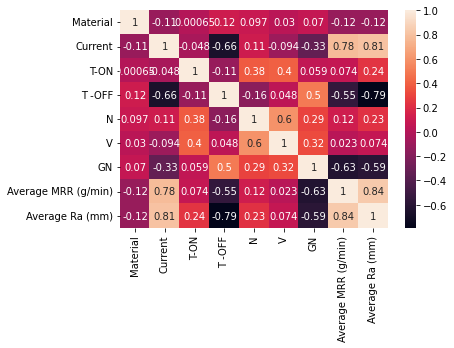

In [ ]:
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels = corelation.columns,annot = True)

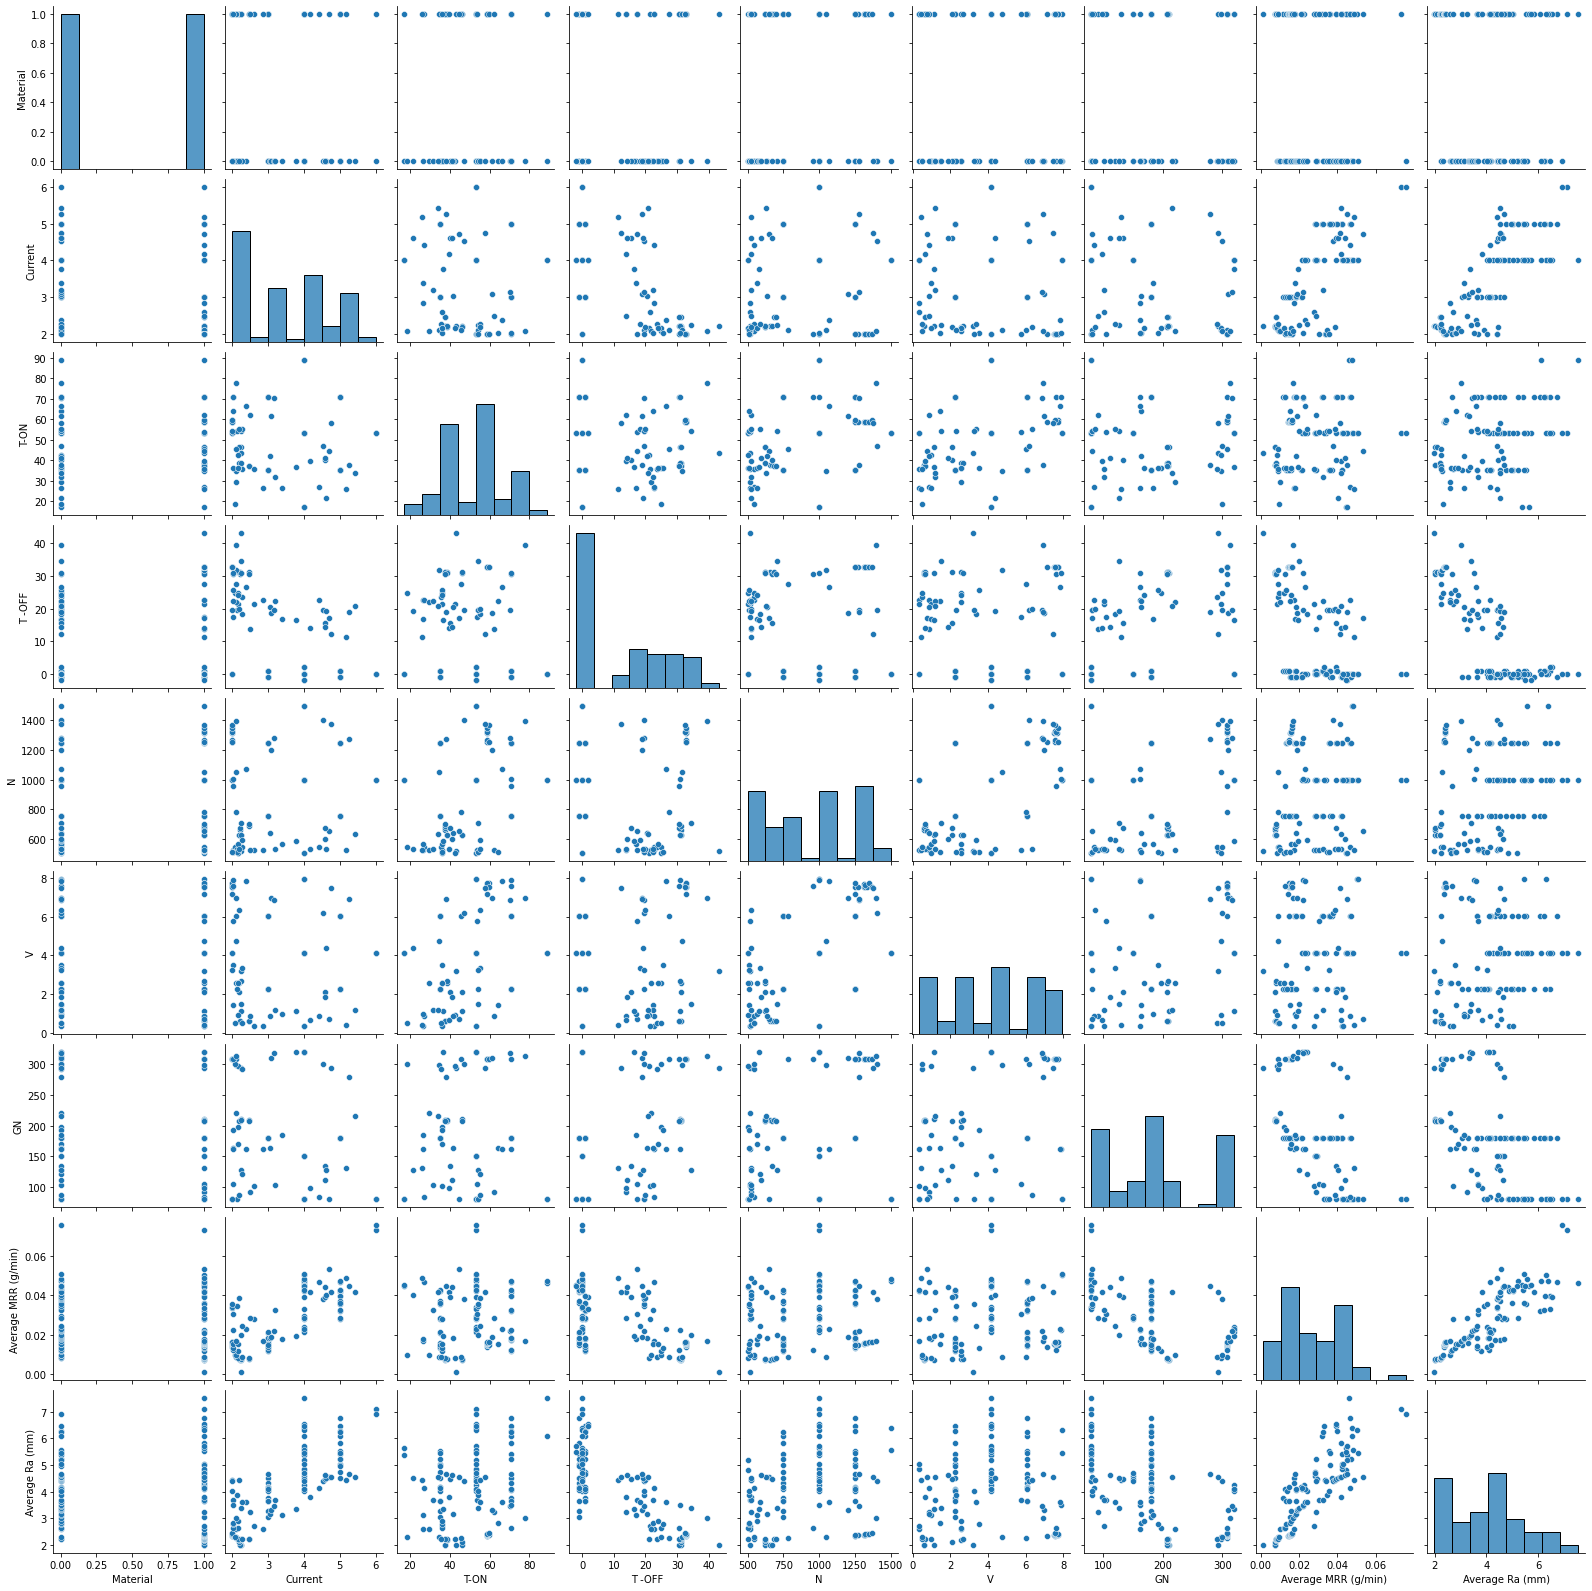

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,Material,Current,T-ON,T -OFF,N,V,GN,Average MRR (g/min),Average Ra (mm)
0,1,4.0,53.0,0.0,1000.0,4.15,320.0,0.0227,4.24
1,1,4.0,53.0,0.0,1000.0,4.15,320.0,0.0215,4.11
2,1,3.0,35.0,-1.0,750.0,2.25,180.0,0.0151,3.06
3,1,5.0,71.0,-1.0,750.0,2.25,180.0,0.0417,5.82
4,1,5.0,35.0,1.0,750.0,2.25,180.0,0.0281,4.74


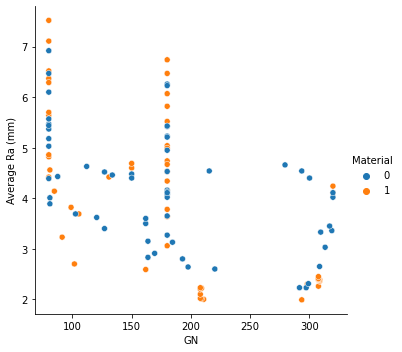

In [ ]:
sns.relplot(x = 'GN',y = 'Average Ra (mm)',hue = 'Material',data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


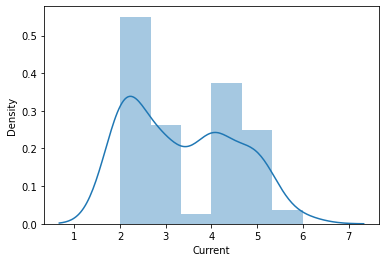

In [ ]:
sns.distplot(X_train['Current'])

In [ ]:
 from sklearn.ensemble import RandomForestRegressor



regr = RandomForestRegressor(n_estimators = 30, random_state=42)
regr.fit(Y_train1, Y_train2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_train2

,Average MRR (g/min)
0,0.0227
1,0.0215
2,0.0151
3,0.0417
4,0.0281
...,...
115,0.0404
116,0.0416
117,0.0417
118,0.0442


In [ ]:
RandomForestRegressor(...)
>>> print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

In [ ]:
a = np.array([ 1,2.00, 17, 30 ,500 ,0.35 ,320 ])
a = a.reshape(1,7)
a.shape

In [ ]:
y_pred = regr.predict(Y_test1)

In [ ]:
import sklearn
from sklearn import metrics

In [ ]:
y_pred

array([0.01652674, 0.01463869, 0.01636496, 0.01449035, 0.01639693,
       0.01576929, 0.02073   , 0.00875936, 0.01552163, 0.01659929,
       0.02427778, 0.01576929, 0.01988967, 0.01777467])

In [ ]:
Y_test2

,Average MRR (g/min)
0,0.0070
1,0.0074
2,0.0122
3,0.0089
4,0.0098
5,0.0145
6,0.0103
7,0.0097
8,0.0128
9,0.0098


In [ ]:
sklearn.metrics.r2_score(Y_test2, y_pred, sample_weight=None, multioutput='uniform_average')

-2.7644690188035335

In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# load the dataset

# define model
model = XGBRegressor()
model1 = XGBRegressor()
model1.fit(X_train,Y_train1)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, Y_train1, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

[06:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean MAE: 0.002 (0.001)


In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train1)

# transform training data
X_train_norm = norm.transform(X_train1)

# transform testing dataabs
X_test_norm = norm.transform(X_test1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=6)

rmse = []
knn.fit(X_train_norm,Y_train2)

# raw, normalized and standardized training and testing data


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
y_pred = knn.predict(X_test_norm)

In [ ]:
y_pred

array([[0.0086    ],
       [0.0076    ],
       [0.00805   ],
       [0.00851667],
       [0.02196667],
       [0.01273333],
       [0.00906667],
       [0.0086    ],
       [0.00805   ],
       [0.00851667],
       [0.02196667],
       [0.01233333],
       [0.01273333],
       [0.00906667]])

In [ ]:
Y_test2

,Average MRR (g/min)
0,0.0070
1,0.0074
2,0.0122
3,0.0089
4,0.0098
5,0.0145
6,0.0103
7,0.0097
8,0.0128
9,0.0098


In [ ]:
sklearn.metrics.r2_score(Y_test2, y_pred, sample_weight=None, multioutput='uniform_average')

-6.936256911297558

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu')) 
model.add(Dense(4, activation='relu')) 
#model.add(Dense(32, activation='relu')) 
#model.add(Dense(16, activation='relu')) 
#model.add(Dense(8 , activation='relu'))
model.add(Dense(1, activation='linear'))  


model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y_train3 = Y_train2*1000
Y_test3 = Y_test2*1000

In [ ]:


model.fit(Y_train1, Y_train2 ,verbose=1, epochs=1000, 
                   )


Epoch 1/1000
4/4 [==============================] - 0s 5ms/step - loss: 7.6309e-05
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 8.0720e-05
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 7.1792e-05
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 7.1129e-05
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 7.2930e-05
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.9596e-05
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 7.0102e-05
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 6.6928e-05
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.8544e-05
Epoch 10/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.8121e-05
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 6.6038e-05
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 6.6188e-05
E

In [ ]:
X_test1

,Material,Current,T-ON,T -OFF,N,V,GN,Average Ra (mm)
0,1,2,17,30,500,0.35,320,2.50
1,1,2,17,30,500,3.50,320,2.54
2,1,2,89,30,500,0.35,320,2.98
3,1,2,17,30,1000,0.35,320,2.57
4,1,2,17,30,500,0.35,80,2.45
5,1,2,17,30,1000,7.95,320,2.95
6,1,2,17,30,500,7.95,320,2.70
7,0,2,17,30,500,0.35,320,2.28
8,0,2,89,30,500,0.35,320,3.08
9,0,2,17,30,1000,0.35,320,2.86


In [ ]:
y_pred = model.predict(Y_test1)

In [ ]:
y_pred

array([[0.0133293 ],
       [0.01369686],
       [0.01774005],
       [0.01397253],
       [0.01286984],
       [0.01746438],
       [0.01516711],
       [0.0113077 ],
       [0.01865895],
       [0.01663736],
       [0.03005341],
       [0.01746438],
       [0.02141567],
       [0.01893463]], dtype=float32)

In [ ]:
Y_test2

,Average MRR (g/min)
0,0.0070
1,0.0074
2,0.0122
3,0.0089
4,0.0098
5,0.0145
6,0.0103
7,0.0097
8,0.0128
9,0.0098


In [ ]:
sklearn.metrics.r2_score(Y_test2, y_pred, sample_weight=None, multioutput='uniform_average')

-2.7770329041265445

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(Y_train1,Y_train2)
y_pred = clf.predict(Y_test1)
print(r2_score(Y_test2,y_pred))

-3.265136078465262
